Installation des dépendances

In [69]:
#Matpotlib pour pouvoir afficher des graphiques pour voir l'evolution de notre apprentissage 
import matplotlib.pyplot as plt 


# tensorflow 
import tensorflow as tf 
#numpy pour manipuler des vecteurs et des matrices 
#pandas pour gerer beaucoup de données
import numpy as np 
import pandas as pd 

# autres imports 
import sys


# import d'un stadardisateur de donnees 
# StandardScaler est : z= (x-u)/s
# x est l'entrée 
# u est la moyenne des entrées 
# s est l'ecart type 
# ca va recentrer toutes les valeurs autour d'une moyenne de 0
from sklearn.preprocessing import StandardScaler



In [70]:
assert hasattr(tf, "function") # vérifer que notre vertion est bien tensrflow 2.0

In [71]:
#keras est .....
from tensorflow import keras



#fashion_mnist une base de données avec des images des vetements 28X28 avec differents coulleurs de 0 à 255
#Dans cette base de donnée on recupere les images et les targets
fashion_mnist = keras.datasets.fashion_mnist
(images, targets), (_,_) = fashion_mnist.load_data()


#on utilise que 10 000 images et targets de la base de données
images = images[:10000]
targets = targets [:10000]


#a chaque fois qu'on a une base de données, il faut la print pour voir ce qu'elle a
print (images.shape)
print (targets.shape)

#Afficher une image 
#print(images[1])


# afficher la moyenne
print(images.mean())

# afficher l ecart type 
print(images.std())


# standardisation des données 
# objectif diminuer la moyenne et l ecart type pour qu'elle soit proche de 0
images = images.reshape(-1, 784)
images = images.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)

# afficher un saut de ligne
print()


#print(targets[0])

# afficher la moyenne
print(images.mean())

# afficher l ecart type 
print(images.std())

(10000, 28, 28)
(10000,)
73.00877385204082
90.2745808471392

-1.0476880134421886e-18
1.0000000000000007


In [51]:

#Creation des classes associees a chaque target 
#  
#targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneacker", "Bag", "Ankle boot"
#]

#plot one image 
# si on change le nombre 11 par 10 on est sur une autre image
#plt.imshow(images[11], cmap="binary")
#plt.title(targets_names[targets[11]])

#plt.show()

In [52]:
#print("frist line of one image", images[11][0])
#print("Associated targets", targets[11])



In [53]:
#Creation du modele

# ##### FLATTEN THE IMAGE

# on ajoute 2 couche (layer) avant d'avoir le resultat 
# la premiere de 256 neurones. chaque neurone a 784 poids (28X28)
# la deuxieme de 128 neurones. chaque neurone a 256 poids avec la premiere couche

# la sortie est de 10 neurones. chaque neurone a 128 poids avec la deuxieme couche



# on trasforme l'image pour qui est un tableau a double dimentions en un seul vecteur 

#model = tf.keras.models.Sequential() # un cree un modele de type sequence pour pouvoir faire des modifications sur l'image 


#model.add(tf.keras.layers.Flatten(input_shape= [28, 28])) # on applatie l'image 

#print("Shape of the image", images[0:1].shape) # on affiche une image de 28X28

#model_output = model.predict(images[0:1])

#print("Shape of the image after the flatters", model_output.shape) #afficher l'image apres l'avoir applatie. la resution est 1 par 784 donc nous n'avons pas perdu de donnees 


In [63]:
#### ADD THE LAYERS

model = keras.models.Sequential()# un cree un modele de type sequence pour pouvoir faire des modifications sur l'image 
#model.add(tf.keras.layers.Flatten(input_shape= [28, 28]))# on applatie l'image 


# add the layers 
model.add(tf.keras.layers.Dense(256, activation="relu"))
# on definit un calque a un layer de 256 neurones
model.add(tf.keras.layers.Dense(128, activation="relu"))
# on definit un calque a un layer de 128 neurones
model.add(tf.keras.layers.Dense(10, activation="softmax"))
# on definit un calque de 10 neurones a la sortie 

model_output = model.predict(images[0:1]) # on fait une prediction sur ma premiere image 

print(model_output, targets[0:1])# on affiche la prediction 
# le 1 est l'adition des valeurs de sortie soient egale a 1. c'est des probabilitées

#https://stackoverflow.com/questions/54677761/deprecation-warning-how-to-remove-tf-keras-warning-calling-variancescaling-i




# LE MODELE S INITIALISE A CHAQUE FOIS DONC DES PROBABILITE DIFERENTES



[[0.1406215  0.15652646 0.26970622 0.00751309 0.22179179 0.05541474
  0.0039634  0.02717976 0.0532686  0.06401438]] [9]


In [64]:
### resume du modele qui vient d'etre cree
model.summary()
## "Trainable param" est le nombre de parametres qui peuvent etre modifies par le tensorflow automatiquement dans le but de reduire l'erreur.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  200960    
_________________________________________________________________
dense_10 (Dense)             multiple                  32896     
_________________________________________________________________
dense_11 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [65]:
### Compile the model 

# definire une descente de gradient pour optimiser le code 

model.compile(
    loss="sparse_categorical_crossentropy", # le loss est le resultat de l'erreur actuelle 
    optimizer="sgd",
    metrics=["accuracy"] #c est un pourcentage
) 



Caterogical cross entropy 

In [66]:
# prends 5 images et les 5 labels des 5 images 

images_test = images[:5]
labels_test = targets[:5]

# afficher 5 images de 784 valeurs 
print(images_test.shape)

# afficher les labels. nous avons donc 3 labels (9,0 et 3)
print(labels_test)

# on fait une prediction sur les 5 images qu on lui a donné 
outputs_test = model.predict(images_test)
# afficher la prediction des 5 images. chaque prediction a 10 valeurs
print(outputs_test.shape)

# saut de ligne 
print()

# afficher les valeurs des 5 images. le total est egal a 1. 
print("Outputs", outputs_test)




(5, 784)
[9 0 0 3 0]
(5, 10)

Outputs [[0.14062156 0.15652654 0.26970613 0.00751309 0.22179191 0.05541473
  0.0039634  0.02717977 0.05326859 0.06401432]
 [0.15052468 0.02071792 0.42421216 0.02316337 0.09419264 0.03086849
  0.00173627 0.16816613 0.08017241 0.00624588]
 [0.06406236 0.12368698 0.13795525 0.04467923 0.10684867 0.12562405
  0.08232499 0.14126407 0.06778525 0.10576921]
 [0.133643   0.04518743 0.22250256 0.09093082 0.08158075 0.05190379
  0.05756522 0.1320151  0.04935263 0.13531876]
 [0.09902688 0.14854361 0.3487563  0.0192325  0.06252293 0.07083689
  0.01213333 0.17797895 0.02477483 0.03619375]]


Former le modèle

In [67]:

#lancement de l'apprentissage
history = model.fit(images, targets, epochs=10) 
#"epochs=10" c'est un passage de 10 fois sur le dataset en reduisant l'erreur

# le "acc" est le nombre de resultats corects qui ont ete realises


Epoch 1/10
10000/10000 [==============================] - 3s 263us/sample - loss: 0.8385 - acc: 0.7218
Epoch 2/10
10000/10000 [==============================] - 2s 179us/sample - loss: 0.5018 - acc: 0.8250
Epoch 3/10
10000/10000 [==============================] - 2s 183us/sample - loss: 0.4299 - acc: 0.8460
Epoch 4/10
10000/10000 [==============================] - 2s 174us/sample - loss: 0.3865 - acc: 0.8656
Epoch 5/10
10000/10000 [==============================] - 2s 182us/sample - loss: 0.3554 - acc: 0.8741
Epoch 6/10
10000/10000 [==============================] - 2s 166us/sample - loss: 0.3290 - acc: 0.8855
Epoch 7/10
10000/10000 [==============================] - 2s 194us/sample - loss: 0.3093 - acc: 0.8915
Epoch 8/10
10000/10000 [==============================] - 2s 178us/sample - loss: 0.2906 - acc: 0.8962
Epoch 9/10
10000/10000 [==============================] - 2s 210us/sample - loss: 0.2716 - acc: 0.9045
Epoch 10/10
10000/10000 [==============================] - 2s 178us/sampl

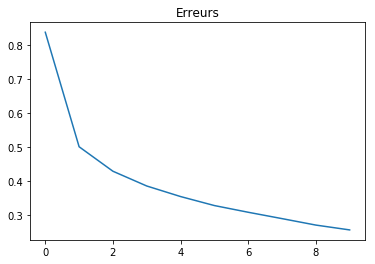

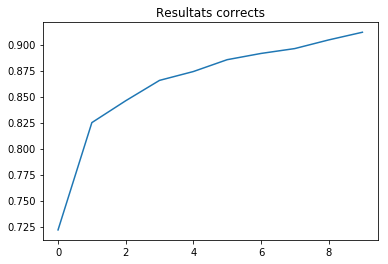

In [68]:
loss_curve =history.history["loss"]
acc_curve = history.history["acc"]

plt.plot(loss_curve)
plt.title("Erreurs")
plt.show()

plt.plot(acc_curve)
plt.title("Resultats corrects")
plt.show()